# Multiclass Classification of White Wine Quality

## Wine Data
Data from http://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Citations
<pre>
Dua, D. and Karra Taniskidou, E. (2017). 
UCI Machine Learning Repository [http://archive.ics.uci.edu/ml/index.php]. 
Irvine, CA: University of California, School of Information and Computer Science.
</pre>

<pre>
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
</pre>

Available at:
- [@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
- [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
- [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

## Setup

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

white_wine = pd.read_csv('../../ch_09/data/winequality-white.csv', sep=';')

## EDA

In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<AxesSubplot:title={'center':'White Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

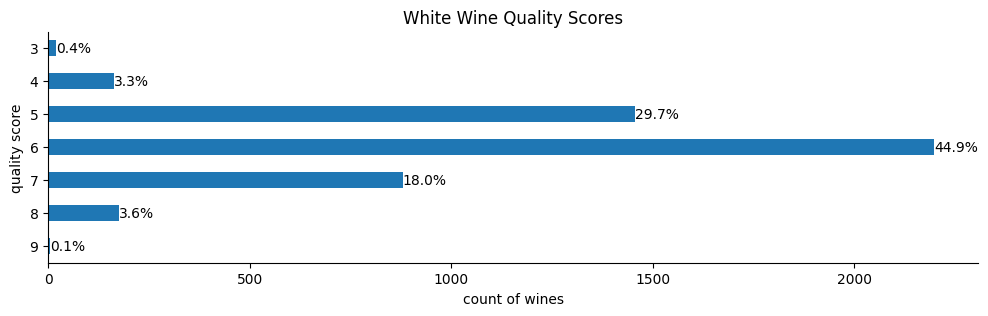

In [7]:
def plot_quality_scores(df, kind):
    ax = df.quality.value_counts().sort_index().plot.barh(
        title=f'{kind.title()} Wine Quality Scores', figsize=(12, 3)
    )
    ax.axes.invert_yaxis()
    for bar in ax.patches:
        ax.text(
            bar.get_width(), 
            bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width()/df.shape[0]:.1%}',
            verticalalignment='center'
        )
    plt.xlabel('count of wines')
    plt.ylabel('quality score')

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    return ax

plot_quality_scores(white_wine, 'white')

## White wine quality multiclass classification

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

y = white_wine.quality
X = white_wine.drop(columns=['quality'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y
)

lm_pipeline = Pipeline([
    ('scale', StandardScaler()), 
    ('lm', LogisticRegression(multi_class='multinomial', random_state=0, max_iter=1000))
]).fit(X_train, y_train)

## Evaluation
Get the predictions:

In [9]:
preds = lm_pipeline.predict(X_test)

Check out the classification report:

In [11]:
# %%capture --no-stdout
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           3       1.00      0.20      0.33         5
           4       0.88      0.17      0.29        41
           5       0.59      0.54      0.56       364
           6       0.53      0.76      0.62       550
           7       0.54      0.21      0.31       220
           8       0.00      0.00      0.00        44
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1225
   macro avg       0.50      0.27      0.30      1225
weighted avg       0.54      0.55      0.51      1225



Multiclass confusion matrix:

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Actual', ylabel='Model Prediction'>

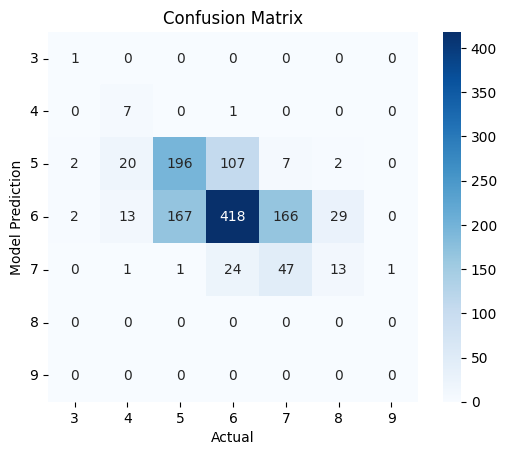

In [12]:
from ml_utils.classification import confusion_matrix_visual

confusion_matrix_visual(y_test, preds, np.sort(y_test.unique()))

### Extend the `plot_roc()` function to multiclass classification problems

In [10]:
from ml_utils.classification import plot_multiclass_roc
plot_multiclass_roc??

Signature: plot_multiclass_roc(y_test, preds, ax=None)
Source:   
def plot_multiclass_roc(y_test, preds, ax=None):
    """
    Plot ROC curve to evaluate classification.

    Parameters:
        - y_test: The true values for y
        - preds: The predicted values for y as probabilities
        - ax: The `Axes` object to plot on

    Returns:
        A matplotlib `Axes` object.
    """
    if not ax:
        fig, ax = plt.subplots(1, 1)

    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='baseline')

    class_labels = np.sort(y_test.unique())
    for i, class_label in enumerate(class_labels):
        actuals = np.where(y_test == class_label, 1, 0)
        predicted_probabilities = preds[:,i]

        fpr, tpr, thresholds = roc_curve(actuals, predicted_probabilities)
        auc_score = auc(fpr, tpr)

        ax.plot(fpr, tpr, lw=2, label=f"""class {class_label}; AUC: {auc_score:.2}""")

    ax.legend()
    ax.set_title('Multiclass ROC curve')
    ax.set_xlabel('Fals

<AxesSubplot:title={'center':'Multiclass ROC curve'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

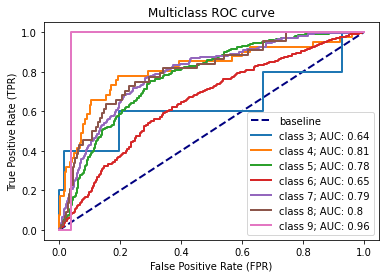

In [11]:
plot_multiclass_roc(y_test, lm_pipeline.predict_proba(X_test))

### Extend the `plot_pr_curve()` function to multiclass classification problems

In [12]:
from ml_utils.classification import plot_multiclass_pr_curve
plot_multiclass_pr_curve??

Signature: plot_multiclass_pr_curve(y_test, preds)
Source:   
def plot_multiclass_pr_curve(y_test, preds):
    """
    Plot precision-recall curve to evaluate classification.

    Parameters:
        - y_test: The true values for y
        - preds: The predicted values for y as probabilities

    Returns:
        A matplotlib `Axes` object.
    """
    class_labels = np.sort(y_test.unique())

    row_count = np.ceil(len(class_labels) / 3).astype(int)
    fig, axes = plt.subplots(row_count, 3, figsize=(15, row_count*5))
    axes = axes.flatten()

    if len(axes) > len(class_labels):
        for i in range(len(class_labels), len(axes)):
            fig.delaxes(axes[i])

    for i, class_label in enumerate(class_labels):
        axes[i].axhline(sum(y_test == class_label)/len(y_test), color='navy', lw=2, linestyle='--', label='baseline')
        actuals = np.where(y_test == class_label, 1, 0)
        predicted_probabilities = preds[:,i]
        precision, recall, thresholds = precision_re

Note how these tell a much different story than the ROC curves, since we have a class imbalance:

array([<AxesSubplot:title={'center':'Precision-recall curve: class 3'}, xlabel='Recall', ylabel='Precision'>,
       <AxesSubplot:title={'center':'Precision-recall curve: class 4'}, xlabel='Recall', ylabel='Precision'>,
       <AxesSubplot:title={'center':'Precision-recall curve: class 5'}, xlabel='Recall', ylabel='Precision'>,
       <AxesSubplot:title={'center':'Precision-recall curve: class 6'}, xlabel='Recall', ylabel='Precision'>,
       <AxesSubplot:title={'center':'Precision-recall curve: class 7'}, xlabel='Recall', ylabel='Precision'>,
       <AxesSubplot:title={'center':'Precision-recall curve: class 8'}, xlabel='Recall', ylabel='Precision'>,
       <AxesSubplot:title={'center':'Precision-recall curve: class 9'}, xlabel='Recall', ylabel='Precision'>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

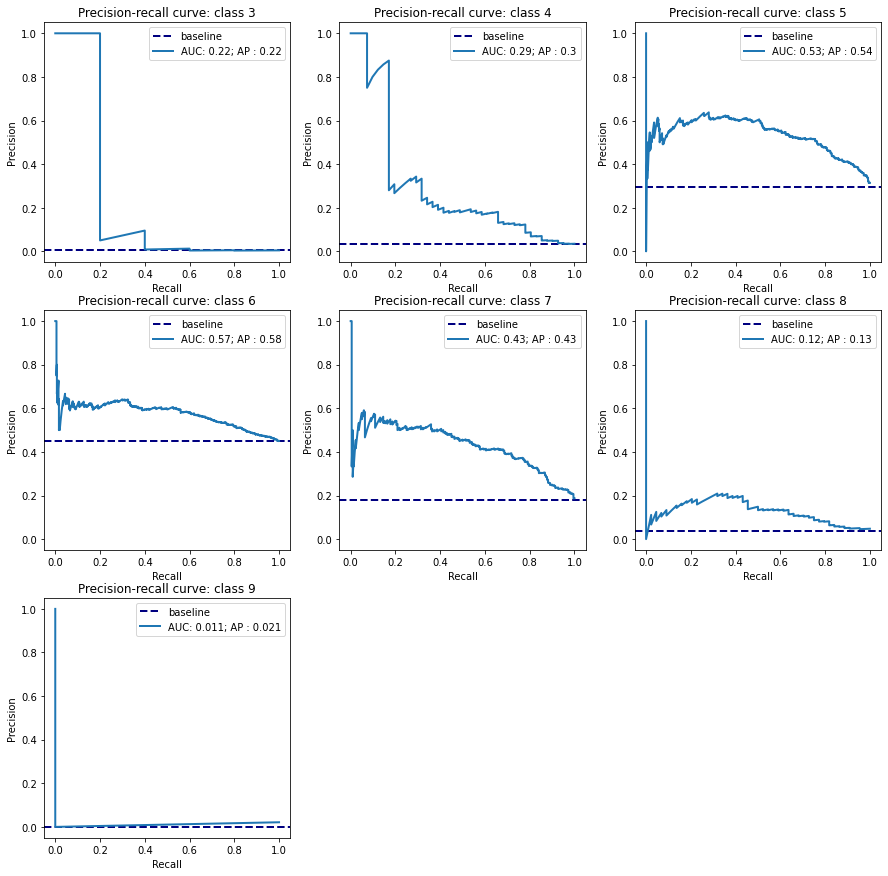

In [13]:
plot_multiclass_pr_curve(y_test, lm_pipeline.predict_proba(X_test))

<hr>
<div>
    <a href="./exercise_3.ipynb">
        <button>&#8592; Previous Solution</button>
    </a>
    <a href="./exercise_5.ipynb">
        <button style="float: right;">Next Solution &#8594;</button>
    </a>
</div>
<hr>